# Importing Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img,img_to_array

In [2]:
train_directory='../input/100-bird-species/train'
val_directory='../input/100-bird-species/valid'
test_directory='../input/100-bird-species/test'

In [3]:
train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [4]:
train_generator=train_datagen.flow_from_directory(train_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

val_generator=val_datagen.flow_from_directory(val_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

test_generator=test_datagen.flow_from_directory(test_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

Found 37815 images belonging to 265 classes.
Found 1325 images belonging to 265 classes.
Found 1325 images belonging to 265 classes.


In [20]:
from keras.applications import ResNet101V2
convlayer=ResNet101V2(input_shape=(224,224,3),weights='imagenet',include_top=False)
convlayer.trainable = False

In [21]:
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(265,activation='softmax'))
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Functional)     (None, 7, 7, 2048)        42626560  
_________________________________________________________________
dropout_11 (Dropout)         (None, 7, 7, 2048)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 100352)            0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 100352)            401408    
_________________________________________________________________
dense_9 (Dense)              (None, 2048)              205522944 
_________________________________________________________________
batch_normalization_10 (Batc (None, 2048)              8192      
_________________________________________________________________
activation_7 (Activation)    (None, 2048)             

In [24]:
opt=tf.keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)
history=model.fit(train_generator,validation_data=val_generator,
         epochs=5)

Epoch 1/5
148/148 [==============================] - 167s 1s/step - loss: 0.1792 - accuracy: 0.9758 - val_loss: 0.2190 - val_accuracy: 0.9509
Epoch 2/5
148/148 [==============================] - 161s 1s/step - loss: 0.1033 - accuracy: 0.9880 - val_loss: 0.1975 - val_accuracy: 0.9540
Epoch 3/5
148/148 [==============================] - 150s 1s/step - loss: 0.0649 - accuracy: 0.9936 - val_loss: 0.1815 - val_accuracy: 0.9547
Epoch 4/5
148/148 [==============================] - 148s 1s/step - loss: 0.0433 - accuracy: 0.9955 - val_loss: 0.1689 - val_accuracy: 0.9585
Epoch 5/5
148/148 [==============================] - 149s 1s/step - loss: 0.0293 - accuracy: 0.9975 - val_loss: 0.1612 - val_accuracy: 0.9585


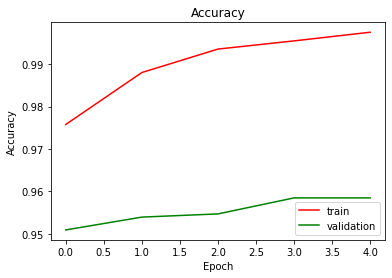

In [25]:
plt.plot(history.history['accuracy'],c='red')
plt.plot(history.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

# Loss Plot

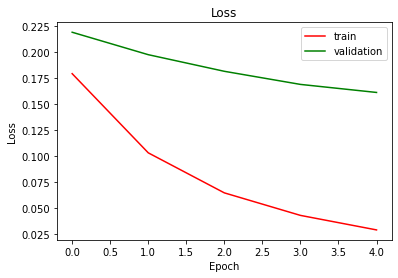

In [26]:
plt.plot(history.history['loss'],c='red')
plt.plot(history.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

In [27]:
model.evaluate(test_generator)

6/6 [==============================] - 9s 1s/step - loss: 0.1389 - accuracy: 0.9668


[0.138911172747612, 0.9667924642562866]

In [28]:
dic=train_generator.class_indices
icd={k:v for v,k in dic.items()}
def pred(pic):
    img=load_img(pic,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict_classes(img)
    probability=round(np.max(model.predict_proba(img)*100),2)
    #print ('Bird Is',icd[answer[0]], 'With probability',probability)
    print (probability, ' % chances are there that the Bird Is',icd[answer[0]])

100.0  % chances are there that the Bird Is BARN SWALLOW


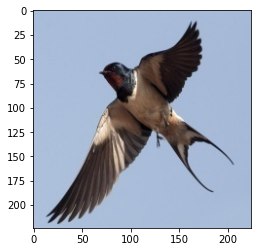

In [72]:
img='../input/100-bird-species/train/BARN SWALLOW/001.jpg'
pic=load_img('../input/100-bird-species/train/BARN SWALLOW/001.jpg',target_size=(224,224,3))
plt.imshow(pic)
pred(img)

100.0  % chances are there that the Bird Is ANTBIRD


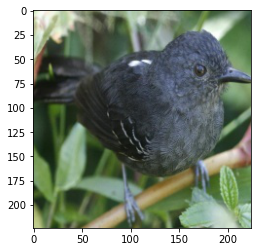

In [73]:
img='../input/100-bird-species/train/ANTBIRD/001.jpg'
pic=load_img('../input/100-bird-species/train/ANTBIRD/001.jpg',target_size=(224,224,3))
plt.imshow(pic)
pred(img)

100.0  % chances are there that the Bird Is BIRD OF PARADISE


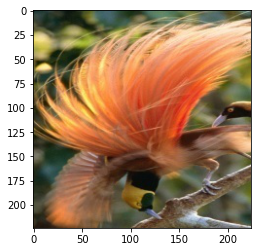

In [74]:
img='../input/100-bird-species/train/BIRD OF PARADISE/002.jpg'
pic=load_img('../input/100-bird-species/train/BIRD OF PARADISE/002.jpg',target_size=(224,224,3))
plt.imshow(pic)
pred(img)

In [41]:
#VGG16
from keras.applications import VGG16
convlayer=VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)
convlayer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [51]:
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(260,activation='softmax'))
opt=tf.keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)
history_1=model.fit(train_generator,validation_data=val_generator,
         epochs=50)

Epoch 1/50
144/144 [==============================] - 142s 989ms/step - loss: 5.6007 - accuracy: 0.0313 - val_loss: 4.5301 - val_accuracy: 0.2746
Epoch 2/50
144/144 [==============================] - 119s 829ms/step - loss: 4.4131 - accuracy: 0.1446 - val_loss: 3.4700 - val_accuracy: 0.4331
Epoch 3/50
144/144 [==============================] - 120s 833ms/step - loss: 3.5840 - accuracy: 0.2712 - val_loss: 2.6630 - val_accuracy: 0.5231
Epoch 4/50
144/144 [==============================] - 120s 837ms/step - loss: 2.9636 - accuracy: 0.3789 - val_loss: 2.1346 - val_accuracy: 0.5977
Epoch 5/50
144/144 [==============================] - 119s 827ms/step - loss: 2.4713 - accuracy: 0.4773 - val_loss: 1.7669 - val_accuracy: 0.6646
Epoch 6/50
144/144 [==============================] - 119s 829ms/step - loss: 2.0741 - accuracy: 0.5542 - val_loss: 1.4740 - val_accuracy: 0.7131
Epoch 7/50
144/144 [==============================] - 119s 828ms/step - loss: 1.7650 - accuracy: 0.6190 - val_loss: 1.2706 -

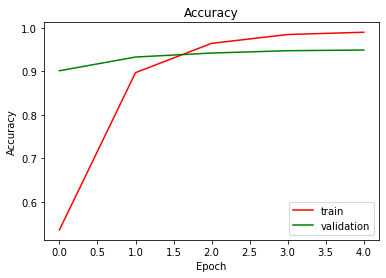

In [52]:
plt.plot(history.history['accuracy'],c='red')
plt.plot(history.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

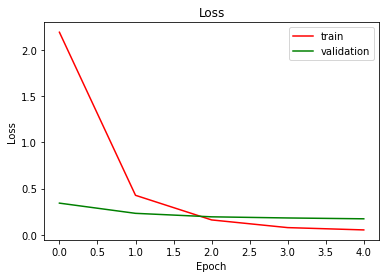

In [53]:
plt.plot(history.history['loss'],c='red')
plt.plot(history.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

In [59]:
model.evaluate(test_generator)

6/6 [==============================] - 3s 548ms/step - loss: 0.3716 - accuracy: 0.9023


[0.3715769648551941, 0.9023076891899109]